# Assignment 5 - Stock Price Prediction


For this assignment, we are asked to predict the percentage change in a financial instrument at a time 2 hours in the future.  

https://www.kaggle.com/c/battlefin-s-big-data-combine-forecasting-challenge

** Note **

Based on given modified data, following is understood

- There are 198 stocks to predict
- At given point, there are 244 features
- training data is given for 150 days at 5 mins interval with 55 entries
- test data is given for 50 days at 5 mins interval with 55 entries
- we need to predict 56th entiry

**Observations**

Two models were tried, one without feature and one with to observe effect of features.

- Model without features saturated after 30 epochs and started performing worse
- Model with features performed better and coveraged better after 100+ epoch

In [1]:
# import libraries

import numpy as np
import pandas as pd
import glob
import zipfile
import os

In [2]:
# unzip data
#zip_ref = zipfile.ZipFile('data/Week5.zip', 'r')
#zip_ref.extractall('data/')
#zip_ref.close()

In [3]:
#read train and test input data

path =r'data/Week_5/train/' 
allFiles = sorted(glob.glob(path + "/*.csv"),key=os.path.getmtime)
train_data = pd.DataFrame()
list_ = []
train_file_index = []
for file_ in allFiles:
    train_file_index.append(int(file_.split('/')[3].split('.')[0]))
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
train_data = pd.concat(list_)


path =r'data/Week_5/test/'
allFiles = sorted(glob.glob(path + "/*.csv"),key=os.path.getmtime)
test_data = pd.DataFrame()
list_ = []
test_file_index = []
for file_ in allFiles:
    test_file_index.append(int(file_.split('/')[3].split('.')[0]))
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
test_data = pd.concat(list_)

In [4]:
train_data.head()

,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10,...,I235,I236,I237,I238,I239,I240,I241,I242,I243,I244
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.268207,0.523644,0.135028,0.226693,0.101070,0.094971,0.050332,0.299584,0.038816,0.081309
1,0.97,0.45,0.16,-0.04,0.21,0.29,0.61,0.79,0.90,-0.04,...,0.785809,1.033014,1.006048,1.132957,0.183963,0.144079,0.355715,0.314446,0.251952,0.206263
2,1.69,0.51,0.00,-0.04,0.31,0.30,0.67,0.81,0.96,0.18,...,0.745939,1.362954,0.945924,1.086542,0.366259,0.267723,0.630238,0.357783,0.510176,0.429069
3,1.71,0.64,0.00,-0.06,0.38,0.31,0.64,0.84,1.01,0.22,...,0.603695,1.209274,0.771079,0.880964,0.451086,0.333353,0.321455,0.388896,0.574862,0.511859
4,1.65,0.51,0.00,-0.06,0.41,0.25,0.58,0.81,0.99,0.18,...,0.466887,1.173604,0.706337,0.808645,0.514879,0.385068,0.050332,0.410417,0.569456,0.565194


In [5]:
# read train and test labels

train_label = pd.read_csv('data/Week_5/trainLabels.csv',index_col=0, header=0)
test_label = pd.read_csv('data/Week_5/testLabels.csv',index_col=0, header=0)

In [6]:
train_label.head()

,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10,...,O189,O190,O191,O192,O193,O194,O195,O196,O197,O198
FileId,,,,,,,,,,,,,,,,,,,,,
1,2.53,1.03,0.12,0.01,0.07,0.88,1.30,1.82,2.13,1.34,...,-0.65,1.58,1.75,-0.10,0.04,0.60,2.04,3.69,3.56,2.03
2,-4.95,0.18,-0.24,-0.04,-0.49,0.68,0.80,0.64,0.92,0.58,...,0.14,0.64,0.47,0.56,0.47,1.34,1.06,1.22,-0.04,0.38
3,0.16,0.00,0.20,-0.20,-0.11,0.76,0.88,0.18,0.45,0.26,...,0.33,0.84,1.22,0.25,1.50,0.70,1.79,-0.04,1.30,1.61
4,4.43,0.06,-0.20,-0.45,-0.62,0.13,4.35,1.47,0.36,2.65,...,-0.27,-0.49,-0.99,0.75,0.30,0.47,-0.02,-0.79,-0.43,-0.53
5,0.76,0.11,0.12,0.08,-0.25,0.12,-0.44,0.60,0.11,0.10,...,0.20,0.48,0.24,-0.11,0.08,0.40,-0.51,1.85,-0.53,-0.57


In [7]:
# sort labels based on how files are read

train_label = train_label.loc[train_file_index]
test_label = test_label.loc[test_file_index]

In [8]:
train_label.head()

,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10,...,O189,O190,O191,O192,O193,O194,O195,O196,O197,O198
FileId,,,,,,,,,,,,,,,,,,,,,
1,2.53,1.03,0.12,0.01,0.07,0.88,1.30,1.82,2.13,1.34,...,-0.65,1.58,1.75,-0.10,0.04,0.60,2.04,3.69,3.56,2.03
10,3.19,0.18,-0.10,-0.10,0.46,0.47,1.36,1.19,0.72,0.80,...,0.78,0.27,0.17,0.60,0.75,1.12,-0.38,1.05,1.94,0.11
100,2.55,1.33,0.40,-0.43,1.33,1.36,0.30,2.18,1.54,0.28,...,-0.46,2.23,2.13,0.24,0.03,1.64,1.83,5.85,4.37,1.41
101,-6.16,0.12,0.30,0.04,-0.46,-0.76,-0.74,-2.60,-0.89,-3.07,...,-1.27,-1.01,-1.00,-0.47,-0.72,-0.15,-1.13,-3.37,-2.92,-1.22
102,5.31,-0.18,0.09,0.00,0.50,-0.03,-0.34,-0.05,-0.12,0.47,...,0.77,-0.19,0.13,-0.03,0.11,0.23,-0.51,0.95,-0.61,-0.60


In [55]:
test_label.head()

,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10,...,O189,O190,O191,O192,O193,O194,O195,O196,O197,O198
FileId,,,,,,,,,,,,,,,,,,,,,
151,-5.16,-1.18,-0.04,0.01,-1.83,-0.90,-1.49,-1.04,-0.63,-0.79,...,-0.61,-1.23,-0.75,-0.12,-0.94,-0.95,-0.46,-1.86,-2.25,-1.35
152,0.95,-0.92,0.20,-0.15,0.21,-0.40,-0.39,-0.02,0.14,0.16,...,0.17,-1.05,-0.14,-0.31,-0.56,-0.20,-0.48,-1.34,-0.62,-0.30
153,2.55,-0.58,0.16,0.07,0.82,0.49,0.00,0.46,0.59,-0.18,...,0.70,0.32,-0.50,-0.03,-0.14,0.32,-0.35,-1.01,-0.49,-0.71
154,0.39,0.40,-0.36,0.51,-0.82,-0.81,-0.87,0.43,0.14,0.43,...,0.28,-0.49,-0.73,-0.66,-1.03,-0.50,-0.48,-0.54,-0.19,-0.09
156,0.62,0.12,-0.08,-0.04,0.79,-0.02,0.29,0.47,0.02,-0.64,...,0.01,0.06,0.32,-0.42,0.04,-0.08,-0.11,2.17,1.25,-0.30


In [ ]:
test_file_index

### Data Preprocessing

Following steps are performed as part of data preprocessing

 - a. reshape training dataset to (150 \* 198,55,199)
  - where 150 \* 198 is number of days \* number of stocks
  - 55 is number of entries per day
  - 199 is stock value (1) + one hot encoding of stocks index (198)
  
  
  
 - b. reshape test dataset to (50 \* 198,55,199)
  - where 50 \* 198 is number of days \* number of stocks
  - 55 is number of entries per day
  - stock value (1) + one hot encoding of stocks index (198)
  
 - c. stock features are treated as embedding for each day and converted to embedding matrix which is concatenated while training the model

 - d. reshape train label to (150 \* 198,55,1)
 
 - e. reshape test label to (50 \* 198,55,1)


In [9]:
feature_col_index = list(range(198,442))

In [10]:
# add feature index

feature_index = np.array(range(train_data.shape[0]))

train_data['feature_index'] = feature_index

feature_index = np.array(range(train_data.shape[0],train_data.shape[0] + test_data.shape[0]))

test_data['feature_index'] = feature_index

In [11]:
embedding_matrix = pd.concat([train_data[:][feature_col_index],test_data[:][feature_col_index]],axis = 0)

In [12]:
def one_hot_encoding(i):
    one_hot_encode = [0] * 198
    
    one_hot_encode[i] = 1
    
    one_hot_matrix = []
    
    for j in range(55):
        one_hot_matrix.append(one_hot_encode)
    
    one_hot_matrix = pd.DataFrame(one_hot_matrix)

    return one_hot_matrix
    

def generate_matrix(day_data):
    
    #this function generate data in format (198,55,245) for each day
    
    col_n = [442]
    
    new_matrix = np.array([])
    matrix_feature_index = np.array([])
    
    for i in range(198):
        
        idx = [i]
        
        row_data = day_data[:][idx]
        
        matrix = one_hot_encoding(i)
        
        row_data = pd.concat([row_data,matrix],axis = 1)
        
        row_data = row_data.as_matrix()
        
        row_data = np.reshape(row_data,(1,55,199))
        
        temp_feature = day_data[:][col_n].as_matrix()
        
        temp_feature = np.reshape(temp_feature,(1,55))
        
        
        if i == 0:
            new_matrix = row_data
            matrix_feature_index = temp_feature
        else:
            new_matrix = np.append(new_matrix,row_data,axis = 0)
            matrix_feature_index = np.append(matrix_feature_index,temp_feature,axis = 0)
            
              
    return new_matrix,matrix_feature_index

In [13]:
train_matrix = np.array([])
train_matrix_feature_index = np.array([])


for day_i in range(0,train_data.shape[0],55):
    if day_i == 0:
        train_matrix, train_matrix_feature_index = generate_matrix(train_data[day_i:day_i+ 55])
        
    else:
        a,b = generate_matrix(train_data[day_i:day_i+ 55])
        train_matrix = np.append(train_matrix,a,axis = 0)
        train_matrix_feature_index = np.append(train_matrix_feature_index,b,axis = 0)
        
    if day_i/55 % 10 == 0:
        print("Processed %s days"% str(day_i/55))

Processed 0.0 days
Processed 10.0 days
Processed 20.0 days
Processed 30.0 days
Processed 40.0 days
Processed 50.0 days
Processed 60.0 days
Processed 70.0 days
Processed 80.0 days
Processed 90.0 days
Processed 100.0 days
Processed 110.0 days
Processed 120.0 days
Processed 130.0 days
Processed 140.0 days


In [14]:
test_matrix = np.array([])
test_matrix_feature_index = np.array([])

for day_i in range(0,test_data.shape[0],55):
    if day_i == 0:
        test_matrix, test_matrix_feature_index = generate_matrix(test_data[day_i:day_i+ 55])
    else:
        a,b = generate_matrix(test_data[day_i:day_i+ 55])
        test_matrix = np.append(test_matrix,a,axis = 0)
        test_matrix_feature_index = np.append(test_matrix_feature_index,b,axis = 0)
        
    if day_i/55 % 10 == 0:
        print("Processed %s days"% str(day_i/55))
        

Processed 0.0 days
Processed 10.0 days
Processed 20.0 days
Processed 30.0 days
Processed 40.0 days


In [15]:
test_matrix.shape

(9900, 55, 199)

In [16]:
train_matrix_feature_index.shape

(29700, 55)

In [17]:
train_labels = []

for i in range(150):
    temp = []
    for j in range(198):
        temp.append(train_label.iloc[i,j])
    
    train_labels.extend(temp)

In [18]:
train_labels = np.array(train_labels)

In [19]:
test_labels = []

for i in range(50):
    temp = []
    for j in range(198):
        temp.append(test_label.iloc[i,j])
    
    test_labels.extend(temp)

In [20]:
test_labels = np.array(test_labels)

In [21]:
test_labels.shape

(9900,)

## Build Model

** LSTM Model** 

In [22]:
from keras.layers import Input, Dense, Embedding, concatenate, LSTM, AveragePooling1D, Reshape, Activation
from keras.models import Model
from keras import optimizers

Using TensorFlow backend.


In [23]:
# create embedding layer

embedding_dim = 244

embedding_layer = Embedding(embedding_matrix.shape[0],
                            embedding_dim,
                            weights=[embedding_matrix],
                            input_length=55,
                            trainable=False)

In [24]:
embedding_matrix.shape

(11000, 244)

###  Model 1 without features

In [40]:
input_matrix = Input(shape=(55,199,))
#input_features = Input(shape=(55,))

#embedded_features = embedding_layer(input_features)
#input_layer = concatenate([input_matrix,embedded_features])

input_layer = input_matrix

print("Input layer shape %s" % input_layer.shape)

lstm_layer = LSTM(64,dropout=0.3)

encoded_layer = lstm_layer(input_layer)

print("LSTM layer output shape %s" % encoded_layer.shape)

dense_layer = Dense(1)(encoded_layer)

prediction = Activation('linear')(dense_layer)

#print("Output layer shape %s" % avg_pooling_layer.shape)

#model = Model([input_matrix,input_features], [prediction])
model1 = Model([input_matrix], [prediction])


model1.compile(optimizer = 'adam', loss = 'mean_squared_error')

Input layer shape (?, 55, 199)
LSTM layer output shape (?, 64)


In [41]:
history = model1.fit([train_matrix], 
          [train_labels],
          nb_epoch=25,
          verbose=2,
          batch_size = 128,
         shuffle = True,
         validation_split=0.2)

/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys
/opt/conda/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:2252: UserWarning: Expected no kwargs, you passed 1
kwargs passed to function are ignored with Tensorflow backend
  warnings.warn('\n'.join(msg))


Train on 23760 samples, validate on 5940 samples
Epoch 1/25
24s - loss: 44.6455 - val_loss: 53.2745
Epoch 2/25
22s - loss: 43.0737 - val_loss: 52.2503
Epoch 3/25
23s - loss: 42.6193 - val_loss: 51.7599
Epoch 4/25
23s - loss: 42.0538 - val_loss: 51.2248
Epoch 5/25
22s - loss: 41.4870 - val_loss: 50.3103
Epoch 6/25
21s - loss: 41.0332 - val_loss: 50.0805
Epoch 7/25
23s - loss: 40.5193 - val_loss: 49.2752
Epoch 8/25
22s - loss: 40.0850 - val_loss: 48.8466
Epoch 9/25
22s - loss: 39.7651 - val_loss: 48.2941
Epoch 10/25
22s - loss: 39.2041 - val_loss: 48.6729
Epoch 11/25
22s - loss: 39.0069 - val_loss: 47.5018
Epoch 12/25
21s - loss: 38.6706 - val_loss: 46.6968
Epoch 13/25
22s - loss: 37.6611 - val_loss: 46.0723
Epoch 14/25
22s - loss: 37.3143 - val_loss: 45.7428
Epoch 15/25
23s - loss: 37.4533 - val_loss: 45.5193
Epoch 16/25
22s - loss: 37.3714 - val_loss: 44.9739
Epoch 17/25
23s - loss: 36.8652 - val_loss: 45.0226
Epoch 18/25
23s - loss: 36.5479 - val_loss: 44.5586
Epoch 19/25
23s - loss: 

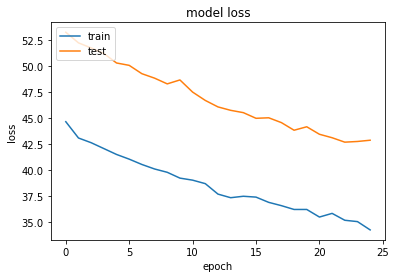

In [42]:
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [48]:
history = model1.fit([train_matrix], 
          [train_labels],
          nb_epoch=25,
          verbose=2,
          batch_size = 128,
         shuffle = True,
         validation_split=0.2)

/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


Train on 23760 samples, validate on 5940 samples
Epoch 1/25
22s - loss: 33.8425 - val_loss: 42.0698
Epoch 2/25
22s - loss: 33.9787 - val_loss: 41.5460
Epoch 3/25
21s - loss: 32.7462 - val_loss: 41.0992
Epoch 4/25
22s - loss: 33.4861 - val_loss: 40.8019
Epoch 5/25
22s - loss: 33.3108 - val_loss: 40.1670
Epoch 6/25
22s - loss: 32.9800 - val_loss: 39.8857
Epoch 7/25
22s - loss: 32.8885 - val_loss: 40.0548
Epoch 8/25
22s - loss: 31.9103 - val_loss: 40.1777
Epoch 9/25
22s - loss: 30.7317 - val_loss: 39.5887
Epoch 10/25
22s - loss: 31.7314 - val_loss: 39.4338
Epoch 11/25
22s - loss: 32.2074 - val_loss: 38.7243
Epoch 12/25
22s - loss: 31.0436 - val_loss: 38.2160
Epoch 13/25
22s - loss: 30.9034 - val_loss: 37.7794
Epoch 14/25
22s - loss: 30.9682 - val_loss: 42.0517
Epoch 15/25
22s - loss: 32.7176 - val_loss: 40.1576
Epoch 16/25
22s - loss: 31.1118 - val_loss: 40.4883
Epoch 17/25
22s - loss: 31.2465 - val_loss: 39.8183
Epoch 18/25
22s - loss: 30.2785 - val_loss: 39.4761
Epoch 19/25
22s - loss: 

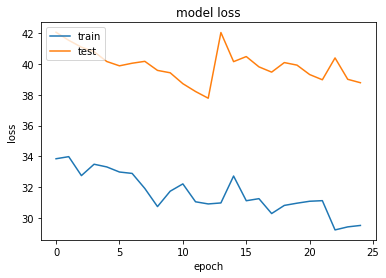

In [49]:
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [43]:
model1.evaluate([test_matrix],[test_labels])

9824/9900 [============================>.] - ETA: 0s

124.76258658086712

###  Model 2 with features

In [44]:
input_matrix = Input(shape=(55,199,))
input_features = Input(shape=(55,))

embedded_features = embedding_layer(input_features)
input_layer = concatenate([input_matrix,embedded_features])


print("Input layer shape %s" % input_layer.shape)

lstm_layer = LSTM(64,dropout=0.3)

encoded_layer = lstm_layer(input_layer)

print("LSTM layer output shape %s" % encoded_layer.shape)

dense_layer = Dense(1)(encoded_layer)

prediction = Activation('linear')(dense_layer)

print("Output layer shape %s" % dense_layer.shape)

model2 = Model([input_matrix,input_features], [prediction])

model2.compile(optimizer = 'adam', loss = 'mean_squared_error')

Input layer shape (?, 55, 443)
LSTM layer output shape (?, 64)
Output layer shape (?, 1)


In [45]:
history = model2.fit([train_matrix,train_matrix_feature_index], 
          [train_labels],
          nb_epoch=25,
          verbose=2,
          batch_size = 128,
         shuffle = True,
         validation_split=0.2)

/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys
/opt/conda/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:2252: UserWarning: Expected no kwargs, you passed 1
kwargs passed to function are ignored with Tensorflow backend
  warnings.warn('\n'.join(msg))


Train on 23760 samples, validate on 5940 samples
Epoch 1/25
28s - loss: 46.9571 - val_loss: 57.3918
Epoch 2/25
26s - loss: 45.6402 - val_loss: 53.9760
Epoch 3/25
27s - loss: 44.2071 - val_loss: 52.3109
Epoch 4/25
27s - loss: 43.6114 - val_loss: 51.7481
Epoch 5/25
27s - loss: 43.2925 - val_loss: 51.1707
Epoch 6/25
27s - loss: 42.6946 - val_loss: 50.5255
Epoch 7/25
27s - loss: 42.3065 - val_loss: 50.0150
Epoch 8/25
27s - loss: 41.7829 - val_loss: 49.3182
Epoch 9/25
28s - loss: 41.2323 - val_loss: 48.7182
Epoch 10/25
28s - loss: 41.0076 - val_loss: 48.2747
Epoch 11/25
28s - loss: 40.7681 - val_loss: 47.7843
Epoch 12/25
28s - loss: 40.7174 - val_loss: 47.3616
Epoch 13/25
29s - loss: 41.0204 - val_loss: 47.0939
Epoch 14/25
29s - loss: 39.6805 - val_loss: 46.6391
Epoch 15/25
27s - loss: 39.5346 - val_loss: 46.1973
Epoch 16/25
29s - loss: 38.6378 - val_loss: 45.2858
Epoch 17/25
29s - loss: 38.7925 - val_loss: 45.0449
Epoch 18/25
29s - loss: 38.4180 - val_loss: 44.3302
Epoch 19/25
31s - loss: 

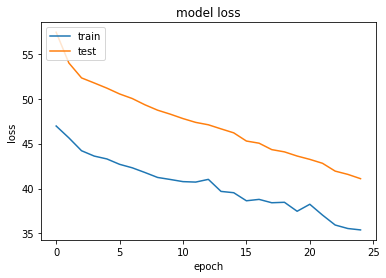

In [46]:
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [50]:
history = model2.fit([train_matrix,train_matrix_feature_index], 
          [train_labels],
          nb_epoch=25,
          verbose=2,
          batch_size = 128,
         shuffle = True,
         validation_split=0.2)

/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


Train on 23760 samples, validate on 5940 samples
Epoch 1/25
27s - loss: 35.9497 - val_loss: 40.5893
Epoch 2/25
26s - loss: 35.2091 - val_loss: 40.1198
Epoch 3/25
27s - loss: 35.0387 - val_loss: 39.3872
Epoch 4/25
27s - loss: 34.1944 - val_loss: 38.8612
Epoch 5/25
26s - loss: 35.3365 - val_loss: 38.7325
Epoch 6/25
27s - loss: 33.3244 - val_loss: 38.3249
Epoch 7/25
26s - loss: 33.2199 - val_loss: 37.7330
Epoch 8/25
27s - loss: 32.4010 - val_loss: 37.1319
Epoch 9/25
27s - loss: 32.4508 - val_loss: 36.8917
Epoch 10/25
27s - loss: 32.8510 - val_loss: 36.4274
Epoch 11/25
27s - loss: 32.5711 - val_loss: 36.3482
Epoch 12/25
27s - loss: 31.3705 - val_loss: 35.7549
Epoch 13/25
26s - loss: 30.2669 - val_loss: 35.2584
Epoch 14/25
27s - loss: 31.1960 - val_loss: 34.9265
Epoch 15/25
27s - loss: 31.7647 - val_loss: 34.5050
Epoch 16/25
26s - loss: 30.8219 - val_loss: 34.2452
Epoch 17/25
27s - loss: 29.3143 - val_loss: 33.8555
Epoch 18/25
26s - loss: 31.6972 - val_loss: 33.5989
Epoch 19/25
27s - loss: 

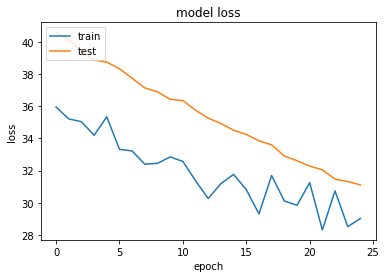

In [51]:
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [53]:
history = model2.fit([train_matrix,train_matrix_feature_index], 
          [train_labels],
          nb_epoch=15,
          verbose=2,
          batch_size = 128,
         shuffle = True,
         validation_split=0.2)

/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


Train on 23760 samples, validate on 5940 samples
Epoch 1/15
27s - loss: 28.7985 - val_loss: 30.8027
Epoch 2/15
27s - loss: 28.2546 - val_loss: 29.9916
Epoch 3/15
27s - loss: 27.7983 - val_loss: 29.8013
Epoch 4/15
27s - loss: 26.1187 - val_loss: 29.3945
Epoch 5/15
27s - loss: 29.0163 - val_loss: 29.9820
Epoch 6/15
26s - loss: 25.7947 - val_loss: 28.4893
Epoch 7/15
27s - loss: 26.6242 - val_loss: 28.1244
Epoch 8/15
27s - loss: 28.1561 - val_loss: 27.8944
Epoch 9/15
27s - loss: 26.7734 - val_loss: 27.5495
Epoch 10/15
27s - loss: 26.1674 - val_loss: 27.3652
Epoch 11/15
27s - loss: 26.2504 - val_loss: 26.9831
Epoch 12/15
27s - loss: 24.2858 - val_loss: 26.7581
Epoch 13/15
27s - loss: 24.5617 - val_loss: 26.6294
Epoch 14/15
27s - loss: 23.7045 - val_loss: 26.1160
Epoch 15/15
26s - loss: 25.7804 - val_loss: 25.4190


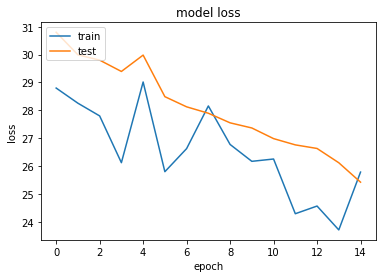

In [54]:
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [58]:
history = model2.fit([train_matrix,train_matrix_feature_index], 
          [train_labels],
          nb_epoch=15,
          verbose=2,
          batch_size = 128,
         shuffle = True,
         validation_split=0.2)

/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


Train on 23760 samples, validate on 5940 samples
Epoch 1/15
27s - loss: 24.1610 - val_loss: 25.3295
Epoch 2/15
27s - loss: 25.0004 - val_loss: 24.8502
Epoch 3/15
26s - loss: 26.0639 - val_loss: 24.5670
Epoch 4/15
26s - loss: 25.2604 - val_loss: 24.5056
Epoch 5/15
27s - loss: 23.8055 - val_loss: 23.9989
Epoch 6/15
27s - loss: 25.6435 - val_loss: 23.8220
Epoch 7/15
27s - loss: 24.7213 - val_loss: 23.9630
Epoch 8/15
27s - loss: 24.9239 - val_loss: 23.7087
Epoch 9/15
27s - loss: 25.8134 - val_loss: 23.0721
Epoch 10/15
27s - loss: 24.4506 - val_loss: 22.9219
Epoch 11/15
26s - loss: 24.6030 - val_loss: 23.2578
Epoch 12/15
26s - loss: 23.8027 - val_loss: 22.7464
Epoch 13/15
27s - loss: 21.9395 - val_loss: 22.3985
Epoch 14/15
27s - loss: 24.9289 - val_loss: 22.1117
Epoch 15/15
27s - loss: 21.8976 - val_loss: 21.9694


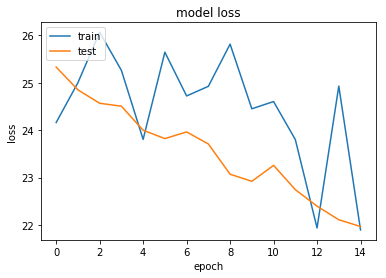

In [59]:
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [61]:
model2.evaluate([test_matrix,test_matrix_feature_index],[test_labels])

9888/9900 [============================>.] - ETA: 0s

99.063144264382245

In [62]:
history = model2.fit([train_matrix,train_matrix_feature_index], 
          [train_labels],
          nb_epoch=25,
          verbose=2,
          batch_size = 128,
         shuffle = True,
         validation_split=0.2)

/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


Train on 23760 samples, validate on 5940 samples
Epoch 1/25
27s - loss: 22.3074 - val_loss: 21.5141
Epoch 2/25
27s - loss: 23.9214 - val_loss: 21.2459
Epoch 3/25
27s - loss: 21.4213 - val_loss: 20.8935
Epoch 4/25
27s - loss: 21.0984 - val_loss: 20.7440
Epoch 5/25
27s - loss: 20.5634 - val_loss: 20.3835
Epoch 6/25
27s - loss: 18.7014 - val_loss: 20.0935
Epoch 7/25
27s - loss: 18.9822 - val_loss: 19.6909
Epoch 8/25
26s - loss: 23.8805 - val_loss: 19.3160
Epoch 9/25
27s - loss: 21.5338 - val_loss: 19.1475
Epoch 10/25
26s - loss: 18.1170 - val_loss: 18.9981
Epoch 11/25
27s - loss: 18.9385 - val_loss: 18.6748
Epoch 12/25
27s - loss: 20.0491 - val_loss: 18.2888
Epoch 13/25
27s - loss: 20.9088 - val_loss: 18.1082
Epoch 14/25
27s - loss: 17.9969 - val_loss: 17.6351
Epoch 15/25
27s - loss: 18.8865 - val_loss: 17.3923
Epoch 16/25
27s - loss: 18.9848 - val_loss: 18.0567
Epoch 17/25
27s - loss: 19.6962 - val_loss: 16.8421
Epoch 18/25
27s - loss: 18.2130 - val_loss: 16.5149
Epoch 19/25
27s - loss: 

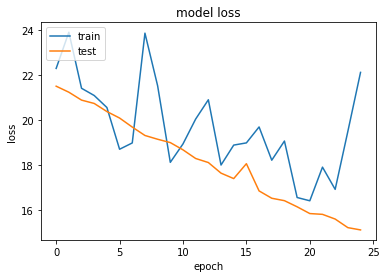

In [63]:
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [64]:
model2.evaluate([test_matrix,test_matrix_feature_index],[test_labels])

9888/9900 [============================>.] - ETA: 0s

89.298652412000322

In [65]:
history = model2.fit([train_matrix,train_matrix_feature_index], 
          [train_labels],
          nb_epoch=25,
          verbose=2,
          batch_size = 128,
         shuffle = True,
         validation_split=0.2)

/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


Train on 23760 samples, validate on 5940 samples
Epoch 1/25
27s - loss: 17.2250 - val_loss: 14.8628
Epoch 2/25
27s - loss: 16.3829 - val_loss: 14.5203
Epoch 3/25
27s - loss: 21.1319 - val_loss: 15.8412
Epoch 4/25
27s - loss: 15.1444 - val_loss: 14.3633
Epoch 5/25
27s - loss: 17.4988 - val_loss: 14.1222
Epoch 6/25
27s - loss: 15.9547 - val_loss: 13.9652
Epoch 7/25
26s - loss: 14.2916 - val_loss: 13.6751
Epoch 8/25
27s - loss: 16.8559 - val_loss: 13.6520
Epoch 9/25
26s - loss: 16.3910 - val_loss: 13.1840
Epoch 10/25
26s - loss: 13.4714 - val_loss: 13.0789
Epoch 11/25
26s - loss: 16.1046 - val_loss: 13.1191
Epoch 12/25
27s - loss: 13.4335 - val_loss: 12.5792
Epoch 13/25
27s - loss: 14.5459 - val_loss: 12.3369
Epoch 14/25
27s - loss: 17.8550 - val_loss: 12.2921
Epoch 15/25
27s - loss: 15.8884 - val_loss: 11.9303
Epoch 16/25
27s - loss: 15.0284 - val_loss: 11.8979
Epoch 17/25
27s - loss: 15.4551 - val_loss: 11.7696
Epoch 18/25
27s - loss: 14.5630 - val_loss: 11.3591
Epoch 19/25
27s - loss: 

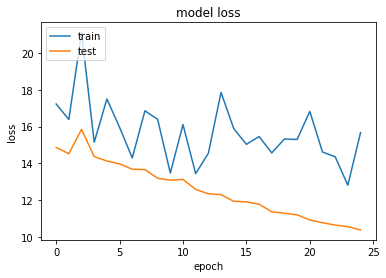

In [66]:
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [67]:
model2.evaluate([test_matrix,test_matrix_feature_index],[test_labels])

9856/9900 [============================>.] - ETA: 0s

80.842761237410585

In [68]:
history = model2.fit([train_matrix,train_matrix_feature_index], 
          [train_labels],
          nb_epoch=25,
          verbose=2,
          batch_size = 128,
         shuffle = True,
         validation_split=0.2)

/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


Train on 23760 samples, validate on 5940 samples
Epoch 1/25
29s - loss: 12.5975 - val_loss: 10.3973
Epoch 2/25
28s - loss: 11.0557 - val_loss: 9.9626
Epoch 3/25
27s - loss: 11.9368 - val_loss: 9.9687
Epoch 4/25
27s - loss: 13.1966 - val_loss: 9.8667
Epoch 5/25
27s - loss: 13.8535 - val_loss: 9.4778
Epoch 6/25
27s - loss: 14.4301 - val_loss: 9.4451
Epoch 7/25
27s - loss: 14.0014 - val_loss: 9.4064
Epoch 8/25
27s - loss: 11.3939 - val_loss: 8.8980
Epoch 9/25
27s - loss: 12.5250 - val_loss: 9.0973
Epoch 10/25
27s - loss: 10.6188 - val_loss: 8.6832
Epoch 11/25
27s - loss: 8.6507 - val_loss: 8.7338
Epoch 12/25
27s - loss: 11.6290 - val_loss: 8.3844
Epoch 13/25
27s - loss: 12.3125 - val_loss: 8.3286
Epoch 14/25
27s - loss: 9.6837 - val_loss: 8.1783
Epoch 15/25
26s - loss: 9.6722 - val_loss: 8.1272
Epoch 16/25
27s - loss: 12.2742 - val_loss: 7.9274
Epoch 17/25
27s - loss: 10.4337 - val_loss: 7.6577
Epoch 18/25
27s - loss: 12.2919 - val_loss: 8.6878
Epoch 19/25
27s - loss: 9.4675 - val_loss: 7

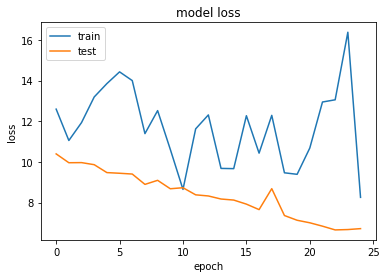

In [69]:
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [70]:
model2.evaluate([test_matrix,test_matrix_feature_index],[test_labels])

9888/9900 [============================>.] - ETA: 0s

73.617885222398868

**Observation **

Solution is converaging better. More epochs would result in better solution

In [78]:
history = model2.fit([train_matrix,train_matrix_feature_index], 
          [train_labels],
          nb_epoch=50,
          verbose=2,
          batch_size = 128,
         shuffle = True,
         validation_split=0.2)

/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


Train on 23760 samples, validate on 5940 samples
Epoch 1/50
27s - loss: 5.1582 - val_loss: 1.3732
Epoch 2/50
27s - loss: 5.1198 - val_loss: 1.9226
Epoch 3/50
28s - loss: 2.6158 - val_loss: 1.3178
Epoch 4/50
27s - loss: 2.8285 - val_loss: 1.1452
Epoch 5/50
28s - loss: 1.9917 - val_loss: 1.4094
Epoch 6/50
27s - loss: 8.7745 - val_loss: 1.7811
Epoch 7/50
27s - loss: 4.4866 - val_loss: 2.1999
Epoch 8/50
27s - loss: 4.6455 - val_loss: 1.7140
Epoch 9/50
27s - loss: 4.0267 - val_loss: 1.6474
Epoch 10/50
28s - loss: 3.7168 - val_loss: 1.5064
Epoch 11/50
27s - loss: 6.4476 - val_loss: 1.3042
Epoch 12/50
27s - loss: 5.6906 - val_loss: 1.6957
Epoch 13/50
27s - loss: 5.6398 - val_loss: 1.2791
Epoch 14/50
26s - loss: 4.4407 - val_loss: 1.6611
Epoch 15/50
27s - loss: 3.3118 - val_loss: 1.3090
Epoch 16/50
27s - loss: 3.0608 - val_loss: 1.2741
Epoch 17/50
27s - loss: 3.5541 - val_loss: 1.4104
Epoch 18/50
27s - loss: 4.5317 - val_loss: 1.3505
Epoch 19/50
27s - loss: 4.6166 - val_loss: 1.4485
Epoch 20/5

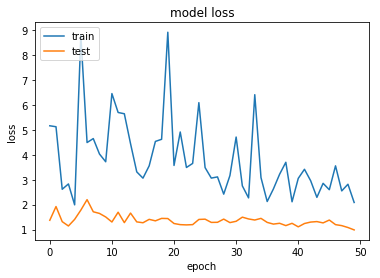

In [ ]:
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model2.evaluate([test_matrix,test_matrix_feature_index],[test_labels])

6240/9900 [=================>............] - ETA: 2s ETA